# TPC 3


## Data Set California Housing

In [0]:
# NOTA: Entreguei o TPC dia 14/11 porque estive a estudar para um teste marcado para esse dia.
# Peço desculpas

# Start by importing the modules

from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [56]:
data = datasets.california_housing.fetch_california_housing()
data

{'DESCR': 'California housing dataset.\n\nThe original database is available from StatLib\n\n    http://lib.stat.cmu.edu/datasets/\n\nThe data contains 20,640 observations on 9 variables.\n\nThis dataset contains the average house value as target variable\nand the following input variables (features): average income,\nhousing average age, average rooms, average bedrooms, population,\naverage occupation, latitude, and longitude in that order.\n\nReferences\n----------\n\nPace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,\nStatistics and Probability Letters, 33 (1997) 291-297.\n\n',
 'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.     

In [57]:
print(data.DESCR)

California housing dataset.

The original database is available from StatLib

    http://lib.stat.cmu.edu/datasets/

The data contains 20,640 observations on 9 variables.

This dataset contains the average house value as target variable
and the following input variables (features): average income,
housing average age, average rooms, average bedrooms, population,
average occupation, latitude, and longitude in that order.

References
----------

Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,
Statistics and Probability Letters, 33 (1997) 291-297.




In [58]:
data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [59]:
dframe = pd.DataFrame(data = data.data, columns=data.feature_names)
dframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [60]:
#Aggregation
dframe['MedInc'].agg(['min','max','mean'])
dframe.agg({'MedInc': ['min','max'],'AveRooms':['min','max']})
dframe.agg(['min','max','mean'])


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704


In [61]:
#Sampling
dframe.sample(n=8, replace=False, weights=None, random_state=None, axis=0)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20578,2.8542,37.0,5.253731,0.970149,238.0,3.552239,38.84,-121.81
7557,2.0134,35.0,3.817280,1.059490,2935.0,4.157224,33.91,-118.19
2766,2.8684,20.0,6.766102,1.745763,659.0,2.233898,33.41,-116.01
19780,3.6310,32.0,9.179775,2.314607,224.0,2.516854,41.15,-122.68
9664,2.0903,34.0,7.612360,1.471910,434.0,2.438202,41.79,-120.08
2852,3.0568,41.0,5.953202,1.071429,973.0,2.396552,35.38,-118.96
1659,8.7059,13.0,7.419355,0.912442,703.0,3.239631,37.93,-121.91
12558,2.7787,47.0,4.750000,1.024590,810.0,3.319672,38.54,-121.45


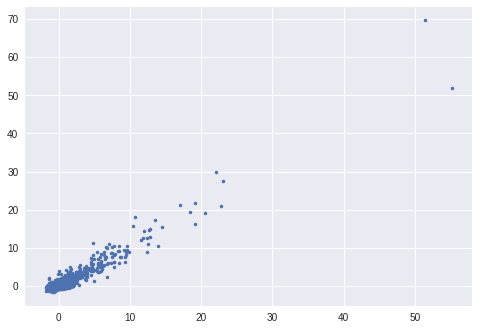

In [62]:
#Dimensionality Reduction
from sklearn import preprocessing
D = data.data
stdscaler = preprocessing.StandardScaler()
scaler = stdscaler.fit(D)
D_norm = scaler.transform(D)

plt.plot(D_norm[:,2], D_norm[:,3], ".")
plt.show()

In [63]:
#Feature Subset Selection
dframe[['MedInc', 'AveRooms', 'Population']]
dframe.iloc[[5,768,12345]]
dframe.iloc[20630:]
dframe.iloc[[2,3], [0, 4]]
dframe.iloc[3:6, [1, 4]]


,HouseAge,Population
3,52.0,558.0
4,52.0,565.0
5,52.0,413.0


In [64]:
#Feature Creation
new_data =np.concatenate((data.data, data.target.reshape(-1,1)*100000), axis=1)
print(type(data.feature_names))
names = data.feature_names + ["Preços"]
print(names)
dframe = pd.DataFrame(data=new_data, columns=names)

dframe.iloc[20630:]

<class 'list'>
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'Preços']


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Preços
20630,3.5673,11.0,5.932584,1.134831,1257.0,2.824719,39.29,-121.32,112000.0
20631,3.5179,15.0,6.145833,1.141204,1200.0,2.777778,39.33,-121.40,107200.0
20632,3.1250,15.0,6.023377,1.080519,1047.0,2.719481,39.26,-121.45,115600.0
20633,2.5495,27.0,5.445026,1.078534,1082.0,2.832461,39.19,-121.53,98300.0
20634,3.7125,28.0,6.779070,1.148256,1041.0,3.026163,39.27,-121.56,116800.0
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,78100.0
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,77100.0
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,92300.0
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,84700.0
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,89400.0


In [65]:
#Discretization and Binarization
from sklearn import preprocessing

binarizer = preprocessing.Binarizer().fit(D)
print(binarizer)
binarizer.threshold=3.5
D
binarizer.transform(D)[:10,:]

A =np.random.uniform(0,4, size=(10,3))
for _ in range(10):
    A[np.random.randint(0,10),np.random.randint(0,3)]=np.nan
A

dfA = pd.DataFrame(A)
dfA

dfA.fillna(dfA.mean(axis=0))

dfA.loc[dfA[0]!= np.nan,:]

Binarizer(copy=True, threshold=0.0)


,0,1,2
0,3.998352,0.361630,1.115554
1,NaN,3.214200,2.261125
2,NaN,NaN,0.464002
3,2.469136,2.891873,2.606880
4,3.471351,2.943454,2.859142
5,1.417883,NaN,3.950047
6,0.598152,0.794163,3.558559
7,3.493165,NaN,1.505907
8,2.138202,1.786432,NaN
9,NaN,1.948544,2.190821


In [66]:
#Attribute Transformation
dframe.transform(lambda x: (x - x.mean()) / x.std())

dframe["Population"] = dframe["AveRooms"] / dframe["AveBedrms"]
dframe["Population"][20634:]


20634    5.903797
20635    4.451872
20636    4.646667
20637    4.647423
20638    4.547677
20639    4.521104
Name: Population, dtype: float64